In [94]:
audiopath = '/Users/antoine/Desktop/GPH/E2024/PFE/song&samples/polyphonic.wav'
_80_bpm = "test/80bpm.wav"
import librosa
import matplotlib.pyplot as plt
import numpy as np
import scipy
from IPython.display import Audio



In [96]:
y, sr = librosa.load(audiopath)
Audio(y,rate=sr)

In [97]:
y, sr = librosa.load(audiopath)
times = librosa.times_like(y, sr=sr)

# find wich note is played when

In [98]:
iD_harmonic = librosa.effects.harmonic(y)
iD_percussive = librosa.effects.percussive(y)

tempo, beat = librosa.beat.beat_track(y=iD_percussive, sr=sr)
iD_percussive

array([-0.0029955 , -0.00340313,  0.00297561, ...,  0.00194973,
        0.00293928,  0.00419336], dtype=float32)

In [99]:
chroma_harm = librosa.feature.chroma_cqt(y=iD_harmonic, sr=sr,cqt_mode="hybrid", threshold=1.3, hop_length=1382,n_octaves=8,bins_per_octave=36)
chroma_filter = np.minimum(chroma_harm,librosa.decompose.nn_filter(chroma_harm,aggregate=np.median,metric='cosine'))
chroma_smooth = scipy.ndimage.median_filter(chroma_filter, size=(1, 9))

In [100]:
len(iD_harmonic)
Audio(iD_harmonic, rate=sr)

In [168]:
# dimension 1 -> note de C à B
# dimension 2 -> 
notes = ["C","C#","D","D#","E","F","F#","G","G#","A","A#","B"]

X = librosa.iirt(y=iD_harmonic, sr=sr, win_length=2048*2//8, hop_length=2048//8, center=True)
gamma = 1

#X = np.log(1.0 + gamma * X)
#X = librosa.cqt(y=X, bins_per_octave=12, n_bins=12*4,fmin=librosa.midi_to_hz(34), norm=None)
pitches, magnitudes = librosa.piptrack(S=X
                                       , sr=sr, threshold=1,ref=np.median)



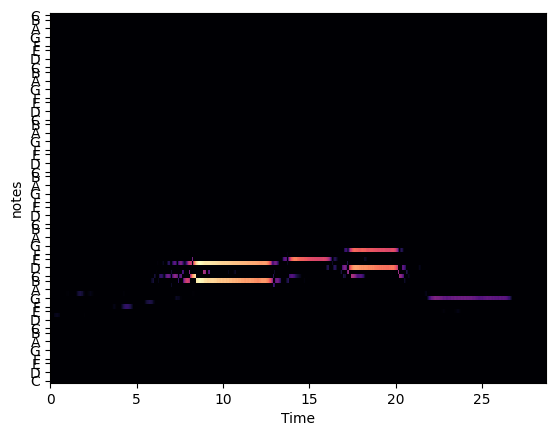

In [171]:
#librosa.display.specshow(magnitudes)
#plt.show()
fig, ax = plt.subplots(nrows=1)
ax.yaxis.set_major_formatter(librosa.display.ChromaFormatter())
librosa.display.specshow(librosa.amplitude_to_db(magnitudes,
                                                 ref=np.max), y_axis="chroma", x_axis='time', ax=ax)
ax.set(ylabel="notes")
ax.label_outer()

#librosa.display.specshow(pitches)
plt.show()

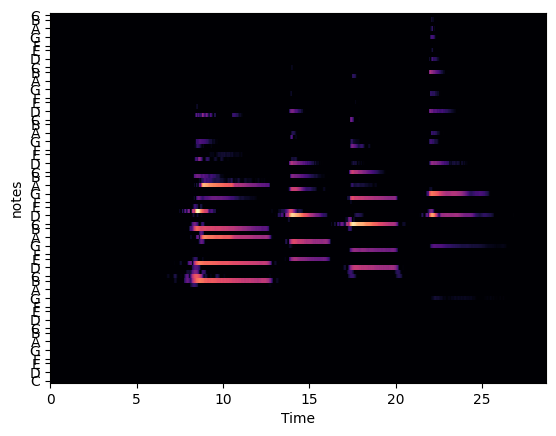

In [170]:
fig, ax = plt.subplots(nrows=1)
ax.yaxis.set_major_formatter(librosa.display.ChromaFormatter())
librosa.display.specshow(librosa.amplitude_to_db(np.abs(X[:,:]),
                                                 ref=np.max), y_axis="chroma", x_axis='time', ax=ax)
ax.set(ylabel="notes")
ax.label_outer()


# Use percussive part of the signal to extract the time rythm information

In [44]:
ratio = lb.feature.tempogram_ratio(y=iD_percussive, sr=sr, bpm=tempo.item())

In [45]:
import librosa
import numpy as np


In [46]:
C = np.abs(librosa.cqt(y=y, sr=sr))
beats = librosa.util.fix_frames(beats)


In [47]:
C_avg = librosa.util.sync(C, beats)

In [48]:
C_med = librosa.util.sync(C, beats,
                             aggregate=np.median)

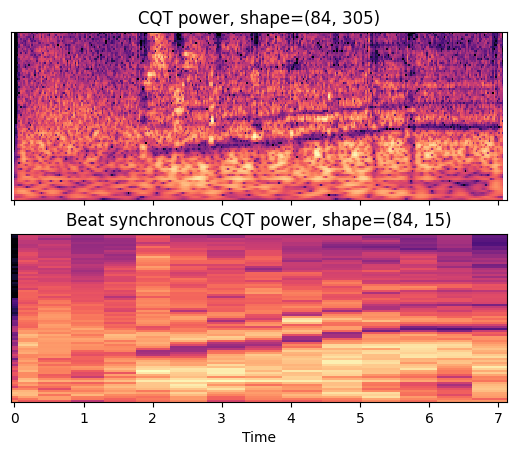

In [53]:
import matplotlib.pyplot as plt
beat_t = librosa.frames_to_time(beats, sr=sr)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
ax[0].yaxis.set_major_formatter(librosa.display.ChromaFormatter())
librosa.display.specshow(librosa.amplitude_to_db(C,
                                                 ref=np.max),
                         x_axis='time', ax=ax[0])
ax[0].set(title='CQT power, shape={}'.format(C.shape))
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(C_med,
                                                 ref=np.max),
                         x_coords=beat_t, x_axis='time', ax=ax[1])
ax[1].set(title='Beat synchronous CQT power, '
                'shape={}'.format(C_med.shape))
ax[1].label_outer()
